<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_03_Tablas_de_frecuencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Crear, visualizar e interpretar tablas de frecuencia de cien datos de personas que contienen la variable edades géneros.

## Desarrollo

### Cargar librerías

In [47]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plot



### Crear datos

In [48]:
# Construyendo un data.frame con los datos simulando datos de
# de personas de edad y géne

random.seed(2023) # Semilla para generar los mismos valores aleatorios de los datos

# Crear una lista aleatoria de edades entre 18 y 25 años
# edades = [random.randint(18, 25) for _ in range(100)]

# Crar edades con media aritmética 22 y desiación std de 3
edades = np.random.normal(22, 3, 100)
edades = np.round(edades)
print(edades)

# Crear una lista aleatoria de géneros (Femenino o Masculino)
generos = [random.choice(['Femenino', 'Masculino']) for _ in range(100)]

# print(edades)
# print(generos)

dic = {'Edad': edades, 'Genero': generos} # Se crea un diccionario
datos = pd.DataFrame(dic) # Crea un data.frame a partir del diccionari

datos

[25. 21. 24. 20. 26. 22. 23. 17. 24. 19. 26. 24. 21. 23. 24. 23. 17. 27.
 22. 27. 20. 19. 21. 19. 27. 27. 19. 23. 24. 20. 21. 24. 25. 18. 18. 23.
 21. 27. 19. 20. 27. 17. 27. 27. 25. 23. 22. 22. 26. 16. 24. 26. 26. 25.
 22. 29. 21. 25. 18. 25. 23. 22. 23. 23. 24. 21. 20. 24. 22. 22. 26. 22.
 20. 24. 22. 26. 26. 22. 25. 21. 25. 24. 22. 22. 23. 20. 22. 21. 22. 17.
 18. 23. 19. 26. 19. 20. 26. 15. 22. 24.]


,Edad,Genero
0,25.0,Masculino
1,21.0,Masculino
2,24.0,Masculino
3,20.0,Masculino
4,26.0,Masculino
...,...,...
95,20.0,Masculino
96,26.0,Femenino
97,15.0,Masculino
98,22.0,Femenino


### Análisis decriptivo de los datos



In [49]:
datos.describe()

,Edad
count,100.000000
mean,22.510000
std,2.959303
min,15.000000
25%,20.750000
50%,22.500000
75%,25.000000
max,29.000000


### Crear tablas de frecuencia

#### Tabla de frecuencia de la edad

La tabla de frecuencia de la edad debe agrupar datos a manera de clases de 2 en 2, es decir:
* clases:  de 18-19, de 20-21, de 22-23, de 24-25 años para determinar una tabla la frecuencia de
* clase,
* frecuecia
* frecuencia relativa,
* frecuencia porcentual,
* frecuencia acumulada
* frecuencia relativa acumulada
* frecuncia porcentual acumulada.



In [50]:

# Crear un DataFrame con las edades
df = pd.DataFrame({'Edad': edades})

# Definir los límites de las clases
limites_clases = [18, 20, 22, 24, 26]

# Definir las etiquetas de las clases
etiquetas_clases = ['18-19', '20-21', '22-23', '24-25']

# Crear una columna en el DataFrame para las clases
df['Clase'] = pd.cut(df['Edad'],
                     bins=limites_clases,
                     labels=etiquetas_clases,
                     right=False)

# Calcular la tabla de frecuencia
tabla_frecuencia = df['Clase'].value_counts().reset_index()
tabla_frecuencia.columns = ['Clase', 'Frec']

# Calcular la frecuencia relativa
tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / len(df)

# Calcular la frecuencia porcentual
tabla_frecuencia['Frec Porc'] = (tabla_frecuencia['Frec Rel'] * 100).round(2)

# Calcular la frecuencia acumulada
tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()

# Calcular la frecuencia relativa acumulada
tabla_frecuencia['Frec Rel Ac'] = (tabla_frecuencia['Frec Ac'] / len(df)).round(2)

# Calcular la frecuencia porcentual acumulada
tabla_frecuencia['Frec Porc Ac'] = (tabla_frecuencia['Frec Rel Ac'] * 100).round(2)

# Mostrar la tabla de frecuencia
print(tabla_frecuencia)


   Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  Frec Porc Ac
0  22-23    27      0.27       27.0       27         0.27          27.0
1  24-25    20      0.20       20.0       47         0.47          47.0
2  20-21    17      0.17       17.0       64         0.64          64.0
3  18-19    11      0.11       11.0       75         0.75          75.0


### Visualizar tabla de frecuencia de edades

Se visualiza el histograma de las edades de los datos

Rango: 14


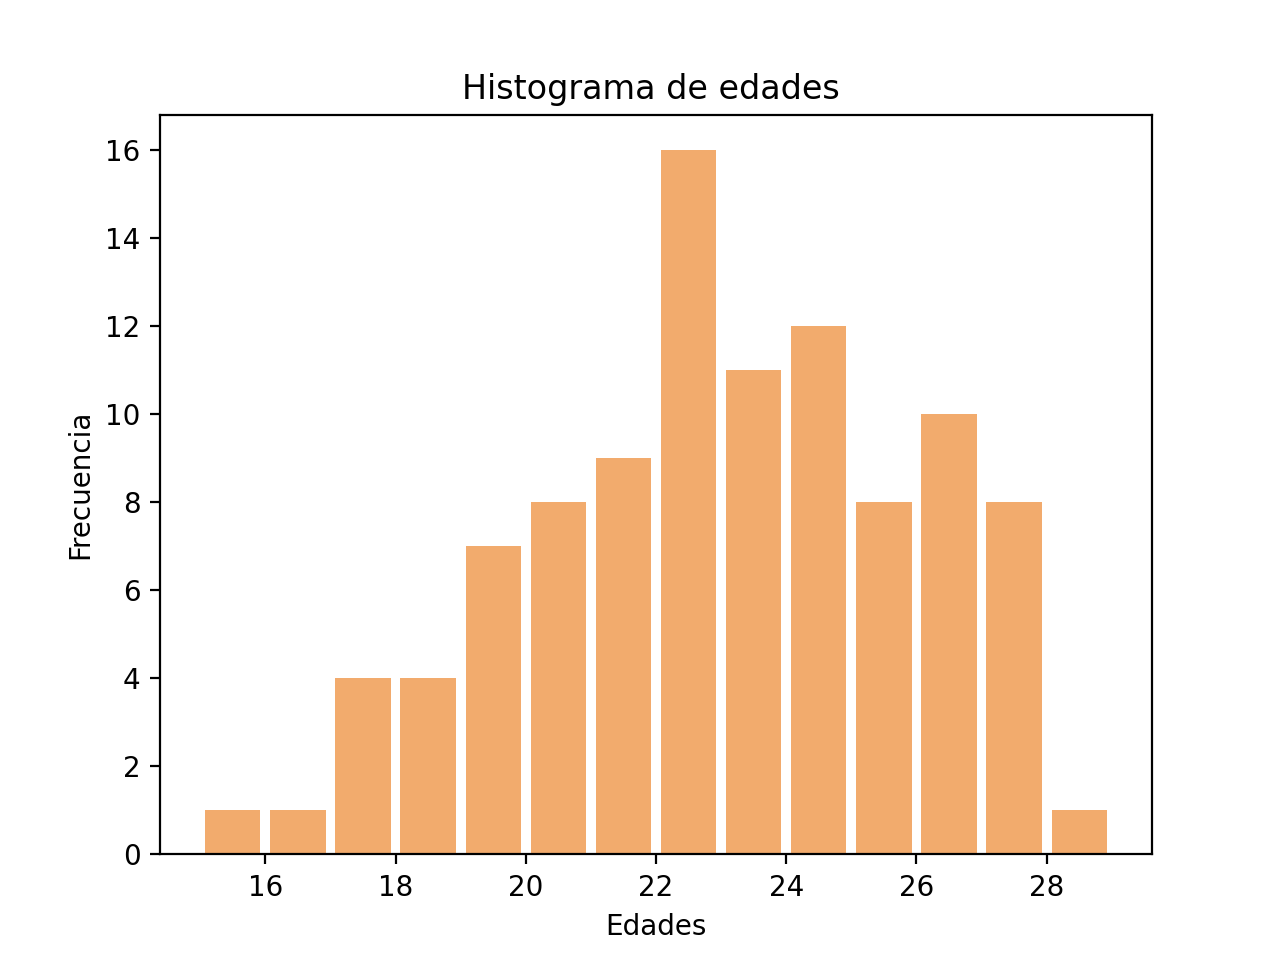

In [51]:

rango = int(np.ptp(edades))


print("Rango:", rango)

plot.hist(x=edades, bins=rango, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de edades ')
plot.xlabel('Edades')
plot.ylabel('Frecuencia')


plot.show() #dibujamos el histograma

### Tabla de frecuencia de género

Determinar cuantas personas hay de cada género



In [52]:
(datos
  .groupby("Genero")
  .agg(frequency=("Genero", "count")))

,frequency
Genero,
Femenino,55
Masculino,45


### Visualizar tabla de frecuncia de género


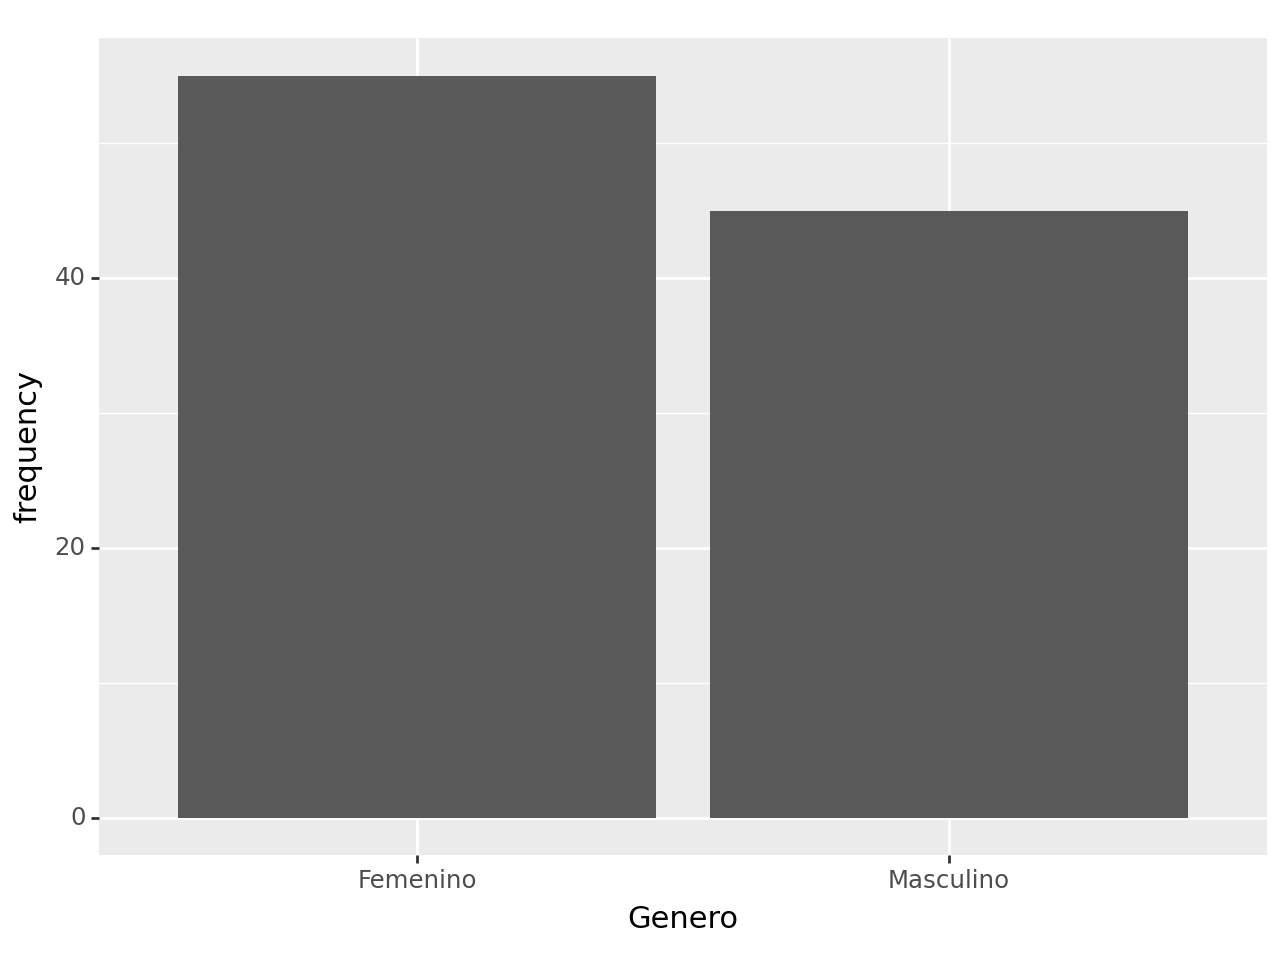

<Figure Size: (640 x 480)>

In [53]:
from plotnine import *

freq_by_genero = (datos
  .groupby("Genero")
  .agg(frequency=("Genero", "count"))
  .reset_index())

(ggplot(freq_by_genero, aes(x = "Genero", y = "frequency")) +
  geom_bar(stat = 'identity'))

## Interpretación

Al menos 100 palabras a título personal

Las tablas de frecuencia representan la cantidad de ocasiones que hay de un valor con respecto al total.

Para este ejercicio hay alrededor de 55 personas del género femenino y 45 del género masculino

Con respecto a la variable edad existen alrededor de 33 personas de 22 a 23 años.